<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Линейная-регрессия" data-toc-modified-id="Линейная-регрессия-1">Линейная регрессия</a></span><ul class="toc-item"><li><span><a href="#Одномерная-линейная-регрессия" data-toc-modified-id="Одномерная-линейная-регрессия-1.1">Одномерная линейная регрессия</a></span><ul class="toc-item"><li><span><a href="#МНК" data-toc-modified-id="МНК-1.1.1">МНК</a></span></li><li><span><a href="#Интерпретация" data-toc-modified-id="Интерпретация-1.1.2">Интерпретация</a></span></li><li><span><a href="#Прогнозирование" data-toc-modified-id="Прогнозирование-1.1.3">Прогнозирование</a></span></li><li><span><a href="#Построение-линии-наименьших-квадратов" data-toc-modified-id="Построение-линии-наименьших-квадратов-1.1.4">Построение линии наименьших квадратов</a></span></li><li><span><a href="#R-квадрат" data-toc-modified-id="R-квадрат-1.1.5">R-квадрат</a></span></li></ul></li><li><span><a href="#Множественная-линейная-регрессия" data-toc-modified-id="Множественная-линейная-регрессия-1.2">Множественная линейная регрессия</a></span><ul class="toc-item"><li><span><a href="#Переобучение-(overfitting)" data-toc-modified-id="Переобучение-(overfitting)-1.2.1">Переобучение (overfitting)</a></span></li><li><span><a href="#Обработка-категориальных-предикторов-с-двумя-категориями" data-toc-modified-id="Обработка-категориальных-предикторов-с-двумя-категориями-1.2.2">Обработка категориальных предикторов с двумя категориями</a></span></li><li><span><a href="#Обработка-категориальных-предикторов-с-более-чем-двумя-категориями" data-toc-modified-id="Обработка-категориальных-предикторов-с-более-чем-двумя-категориями-1.2.3">Обработка категориальных предикторов с более чем двумя категориями</a></span></li></ul></li><li><span><a href="#Линейная-регрессия-в-sklearn" data-toc-modified-id="Линейная-регрессия-в-sklearn-1.3">Линейная регрессия в sklearn</a></span><ul class="toc-item"><li><span><a href="#train-test-split" data-toc-modified-id="train-test-split-1.3.1">train-test-split</a></span></li><li><span><a href="#Кросс-валидация" data-toc-modified-id="Кросс-валидация-1.3.2">Кросс-валидация</a></span></li><li><span><a href="#Lasso,-Ridge-и-ElasticNet-регрессии" data-toc-modified-id="Lasso,-Ridge-и-ElasticNet-регрессии-1.3.3">Lasso, Ridge и ElasticNet регрессии</a></span></li><li><span><a href="#Подбор-гиперпараметров" data-toc-modified-id="Подбор-гиперпараметров-1.3.4">Подбор гиперпараметров</a></span><ul class="toc-item"><li><span><a href="#alpha-в-Lasso" data-toc-modified-id="alpha-в-Lasso-1.3.4.1">alpha в Lasso</a></span></li><li><span><a href="#alpha-и-lambda-в-Elastic-net" data-toc-modified-id="alpha-и-lambda-в-Elastic-net-1.3.4.2">alpha и lambda в Elastic net</a></span></li></ul></li></ul></li><li><span><a href="#Логистическая-регрессия" data-toc-modified-id="Логистическая-регрессия-1.4">Логистическая регрессия</a></span><ul class="toc-item"><li><span><a href="#Метрики-классификации" data-toc-modified-id="Метрики-классификации-1.4.1">Метрики классификации</a></span></li></ul></li><li><span><a href="#Метод-ближайших-соседей" data-toc-modified-id="Метод-ближайших-соседей-1.5">Метод ближайших соседей</a></span><ul class="toc-item"><li><span><a href="#Сравнение-лог.-регрессии-с-kNN" data-toc-modified-id="Сравнение-лог.-регрессии-с-kNN-1.5.1">Сравнение лог. регрессии с kNN</a></span></li><li><span><a href="#Сравнение-лин.-регрессии-с-kNN" data-toc-modified-id="Сравнение-лин.-регрессии-с-kNN-1.5.2">Сравнение лин. регрессии с kNN</a></span></li></ul></li></ul></li></ul></div>

# Линейная регрессия


**Мотивация**

Почему мы изучаем линеную регрессию?
- широко используема
- легко использовать (не нужно тюнить много параметров)
- относительно легко интерпретируема
- является базой для понимания более сложных алгоритмов

**Библиотека**

Мы познакомимся с  библиотекой [Statsmodels](http://statsmodels.sourceforge.net/). Она будет полезна вам в дальнейшем для эконометрики и интерпретации моделей.

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats

**Мы рассмотрим Advertising Dataset**


In [2]:
# read data into a DataFrame
df = pd.read_csv('Advertising.csv', index_col=0)
df.head()

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


Что такое **признаки / регрессоры / независимые переменные / "фичи" / факторы**?
- TV: доллары, потраченные на ТВ рекламу для одного продукта на данном рынке (в тысячах долларов)
- Radio: доллары, потраченные на радио рекламу
- Newspaper: доллары, потраченные на рекламу в газетах

Что такое **таргет / зависимая переменная**?
- Sales: продажи одного продукта на данном рынке (в тысячах)

In [3]:
# print the shape of the DataFrame
df.shape

(200, 4)

В нашей выборке мы имеем 200 **наблюдений / "семплов"** (200 рынков в наборе данных)

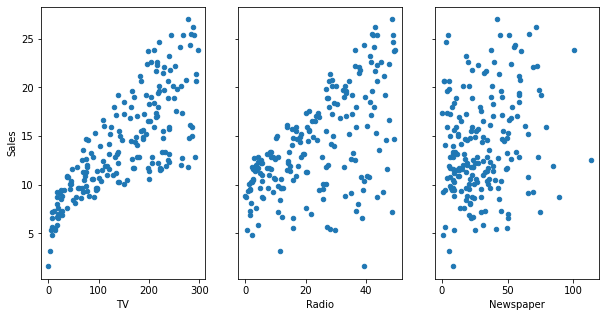

In [4]:
# visualize the relationship between the features and the response using scatterplots
fig, axs = plt.subplots(1, 3, sharey=True)
df.plot(kind='scatter', x='TV', y='Sales', ax=axs[0], figsize=(10, 5))
df.plot(kind='scatter', x='Radio', y='Sales', ax=axs[1])
df.plot(kind='scatter', x='Newspaper', y='Sales', ax=axs[2])
plt.show()

**Вопросы, на которые мы обычно хотим знать ответы**

Давайте представим, что вы работаете на компанию, которая производит и продает этот товар. Компания может задать вам следующий вопрос: на основании этих данных, как мы должны тратить наши рекламные деньги в будущем?

Этот общий вопрос может привести вас к более конкретным вопросам:
1. Существует ли связь между рекламой и продажами?
2. Насколько сильны эти отношения?
3. Какие типы рекламы способствуют росту продаж?
4. Зная расходы на рекламу на конкретном рынке,можем ли мы предсказать продажи?


## Одномерная линейная регрессия

Простая линейная регрессия - это подход к прогнозированию **количественной переменной** с использованием **одного признака**:

$\hat{y} = \beta_0 + \beta_1x$

- $y$ это таргет
- $x$ это признак
- $\beta_0$ это свободный член
- $\beta_1$ это коэффициент при признаке x

Вместе $\beta_0$ and $\beta_1$ называются **коэффициентами модели**. Чтобы создать свою модель, вы должны "выучить" значения этих коэффициентов. И как только мы "выучим" эти коэффициенты, мы сможем использовать модель для прогнозирования продаж!

### МНК

**Оценка ("обучение") коэффициентов модели**


Вообще говоря, коэффициенты оцениваются с использованием **критерия наименьших квадратов**, что означает, что мы находим линию (математически), которая минимизирует **сумму квадратов остатков** (или «сумму квадратов ошибок»):

<img src="image/08_estimating_coefficients.png">

Что изображено на схеме?
- Черные точки - это **наблюдаемые значения** x и y.
- Синяя линия - это наша **линия полученная при минимизации квадратов ошибок**.
- Красные линии - это **остатки**, которые представляют собой расстояния между наблюдаемыми значениями и линией наименьших квадратов.

Как коэффициенты модели соотносятся с линией наименьших квадратов?
- $ \beta_0 $ - это **точка пересечения** (значение $ y $, когда $ x $ = 0)
- $ \beta_1 $ - это **наклон** (изменение $ y $, деленное на изменение $ x $)

Вот графическое изображение этих вычислений:

<img src="image/08_slope_intercept.png">

Давайте попробуем использовать **Statsmodels** для оценки коэффициентов модели на наших данных

In [5]:
df.head(2)

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4


In [6]:
# this is the standard import if you're using "formula notation" (similar to R)
import statsmodels.formula.api as smf

# create a fitted model in one line
model = smf.ols(formula='Sales ~ TV', data=df)
res = model.fit()

# print the coefficients
res.params

Intercept    7.032594
TV           0.047537
dtype: float64

In [7]:
# res.summary()

In [8]:
import statsmodels as sm
# метод без написания формулы через smf

df['const'] = np.ones_like(df['Sales'])
X = df[['const','TV']]
y = df['Sales']

model = sm.regression.linear_model.OLS(
    endog=y, # целевая переменная
    exog=X, # независимые переменные 
    hasconst=True
)
res = model.fit()
# res.summary()
res.params

const    7.032594
TV       0.047537
dtype: float64

### Интерпретация

**Интерпретация коэффициентов модели**

$$y = \beta_0 + \beta_1x$$

Как мы интерпретируем TV коэффициент ($\beta_1$)?
- Дополнительные 1000 долларов, потраченные на телевизионную рекламу, увеличивают продажы на 47,537 товаров.

Обратите внимание, что если бы увеличение расходов на телевизионную рекламу было связано с **снижением** продаж, $\beta_1$ был бы **отрицательным**.

### Прогнозирование

**Использование модели для прогнозирования**

Допустим, появился новый рынок, на котором расходы на телевизионную рекламу составили **$50,000**. Что бы мы спрогнозировали для продаж на этом рынке?

$$y = \beta_0 + \beta_1x$$
$$y = 7.032594 + 0.047537 \times 50$$

In [9]:
# manually calculate the prediction
invest = 50
7.032594 + 0.047537*invest

9.409444

Таким образом, мы могли бы предсказать продажи **9409 товаров** на этом рынке.

Конечно, мы также можем использовать Statsmodels  для прогнозирования:

In [10]:
# you have to create a DataFrame since the Statsmodels formula interface expects it
X_new = pd.DataFrame({
    'const': [1,1],
    'TV': [50,100]
})
X_new.head()

,const,TV
0,1,50
1,1,100


In [11]:
# use the model to make predictions on a new value
res.predict(X_new)

0     9.409426
1    11.786258
dtype: float64

### Построение линии наименьших квадратов

Давайте сделаем прогнозы для **наименьших и наибольших наблюдаемых значений x**, а затем используем предсказанные значения для построения линии наименьших квадратов:

In [12]:
# create a DataFrame with the minimum and maximum values of TV
X_new = pd.DataFrame({
    'const': [1,1],
    'TV': [df.TV.min(), df.TV.max()]
})
X_new.head()

,const,TV
0,1,0.7
1,1,296.4


In [13]:
# make predictions for those x values and store them
preds = res.predict(X_new)
preds

0     7.065869
1    21.122454
dtype: float64

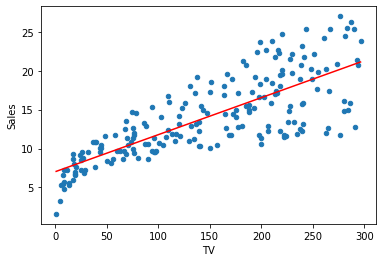

In [14]:
# first, plot the observed data
df.plot(kind='scatter', x='TV', y='Sales')

# then, plot the least squares line
plt.plot(X_new['TV'], preds, c='red')
plt.show()

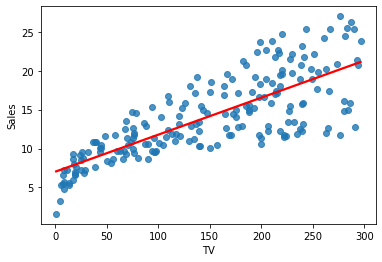

In [15]:
sns.regplot(data=df, x='TV', y='Sales', line_kws=dict(color='r'), ci=None);

### R-квадрат

**Насколько хорошо модель соответствует данным?**

Одним из способом оценки качества линейной модели является значение **R-квадрат**. R-квадрат-это **это доля объяснённой суммы квадратов в общей**:

![](https://miro.medium.com/max/2812/1*JwEiZQSkL4I710994WaY4w.png)

Чем выше R-квадрат, тем лучше, потому что это означает, что большая дисперсия объясняется моделью. Вот пример того, как выглядит R-квадрат":

<img src="image/08_r_squared.png">

Вы можете видеть, что **синяя линия** объясняет некоторую дисперсию в данных (R-квадрат=0,54), **зеленая линия** объясняет большую часть дисперсии (R-квадрат=0,64), а **красная линия** еще больше подходит к данным обучения (R-квадрат=0,66). (Красная линия выглядит так, как будто она **слишком сильно подстраивается**?)

Давайте вычислим значение R-квадрата для нашей простой линейной модели:

In [16]:
# print the R-squared value for the model
res.rsquared

0.6118750508500712

Является ли это "хорошим" значением R-квадрата? Трудно сказать. Порог для хорошего значения R-квадрата широко зависит от области. Поэтому он наиболее полезен в качестве инструмента для **сравнения различных моделей**.

## Множественная линейная регрессия

Простая линейная регрессия может быть легко расширена для включения нескольких объектов. Это называется **множественной линейной регрессией** (вообще, когда говорят о линейной регрессии подразумевают именно ее):

$y = \beta_0 + \beta_1x_1 + ... + \beta_kx_k$

Каждый $x$ представляет собой отдельный признак и имеет свой собственный коэффициент. В этом случае:

$y = \beta_0 + \beta_1 \times TV + \beta_2 \times Radio + \beta_3 \times Newspaper$

Давайте воспользуемся Statsmodels для оценки этих коэффициентов:

In [17]:
df.head(2)

,TV,Radio,Newspaper,Sales,const
1,230.1,37.8,69.2,22.1,1.0
2,44.5,39.3,45.1,10.4,1.0


In [18]:
# create a fitted model with all three features
lm = smf.ols(formula='Sales ~ TV + Radio + Newspaper', data=df).fit()

# print the coefficients
lm.params

Intercept    2.938889
TV           0.045765
Radio        0.188530
Newspaper   -0.001037
dtype: float64

In [19]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Fri, 15 Jul 2022   Prob (F-statistic):           1.58e-96
Time:                        02:27:57   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9389      0.312      9.422      0.000       2.324       3.554
TV             0.0458      0.001     32.809      0.000       0.043       0.049
Radio          0.1885      0.009     21.893      0.000       0.172       0.206
Newspaper     -0.0010      0.006     -0.177      0.860      -0.013       0.011
==============================================================================
Omnibus:                       60.414   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.241
Skew:                          -1.327   Prob(JB):                     1.44e-33
Kurtosis:                       6.332   Cond. No.                         454.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Как мы интерпретируем эти коэффициенты? Для данной суммы расходов на рекламу на радио и в газетах **увеличение расходов на рекламу на телевидении на 1000 долларов увеличивает продажы на 45,765**.


**Несколько слов про значимость полученных результатов**

Вы должны понимать, что **коэффициенты полученные вами это случайные величины**. В примере выше, например, можно сказать, что **реклама в газетах уменьшает количество проданного товара**, тк коэффициент перед сооствествующим коэффициентом отрицательный. Однако, из-за того, что коэффициент маленький **так могло произойти случайно**. Чтобы оценить это вам понадобяться знания, которые вы получите позже :) Однако, даже сейчас вы можете посмотреть отчет, который предлагает Statsmodels и сделать "примерные" выводы о значимости каждого коэффициента 

In [20]:
# print a summary of the fitted model
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Fri, 15 Jul 2022   Prob (F-statistic):           1.58e-96
Time:                        02:27:57   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9389      0.312      9.422      0.000       2.324       3.554
TV             0.0458      0.001     32.809      0.000       0.043       0.049
Radio          0.1885      0.009     21.893      0.000       0.172       0.206
Newspaper     -0.0010      0.006     -0.177      0.860      -0.013       0.011
==============================================================================
Omnibus:                       60.414   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.241
Skew:                          -1.327   Prob(JB):                     1.44e-33
Kurtosis:                       6.332   Cond. No.                         454.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [21]:
lm.params[lm.pvalues <= 0.05]

Intercept    2.938889
TV           0.045765
Radio        0.188530
dtype: float64

In [22]:
lm.params[lm.pvalues > 0.05]

Newspaper   -0.001037
dtype: float64

Что можно увидеть по результатам выше?

- Расходы на рекламу на телевидении и радио **положительно связаны** с продажами, в то время как расходы на рекламу в газетах **незначимо отрицательно связаны** с продажами.
- Эта модель имеет более высокий **R-квадрат** (0,897), чем предыдущая модель, что означает, что эта модель обеспечивает лучшее соответствие данным, чем модель, включающая только TV.

### Переобучение (overfitting)


**R-квадрат всегда будет увеличиваться по мере добавления новых признаков в модель**, даже если они не связаны с таргетом. Таким образом, выбор модели с наибольшим R-квадратом не является надежным подходом для выбора наилучшей линейной модели.


![](https://miro.medium.com/max/875/1*_7OPgojau8hkiPUiHoGK_w.png)

In [23]:
# only include TV and Radio in the model
lm = smf.ols(formula='Sales ~ TV', data=df).fit()
lm.rsquared

0.6118750508500712

In [24]:
# add Newspaper to the model (which we believe has no association with Sales)
lm = smf.ols(formula='Sales ~ TV + Radio + Newspaper', data=df).fit()
lm.rsquared

0.8972106381789522

In [25]:
df["Random"] = np.random.normal(0, 1, df.shape[0])

lm = smf.ols(formula='Sales ~ TV + Radio + Newspaper + Random', data=df).fit()
lm.rsquared

0.897421904710577

### Обработка категориальных предикторов с двумя категориями

До сих пор все наши предсказатели были числовыми. Что, если один из наших предсказателей был категориальным?

Давайте создадим новый бинарный признак под названием **Size** с двумя возможными значениями: **маленький или большой**:

In [26]:
import numpy as np

# set a seed for reproducibility
np.random.seed(12345)

# create a Series of booleans in which roughly half are True
nums = np.random.rand(len(df))
mask_large = nums > 0.5

# initially set Size to small, then change roughly half to be large
df['Size'] = 'small'
df.loc[mask_large, 'Size'] = 'large'
df.head()

,TV,Radio,Newspaper,Sales,const,Random,Size
1,230.1,37.8,69.2,22.1,1.0,-0.234276,large
2,44.5,39.3,45.1,10.4,1.0,-0.999935,small
3,17.2,45.9,69.3,9.3,1.0,-0.973186,small
4,151.5,41.3,58.5,18.5,1.0,1.437067,small
5,180.8,10.8,58.4,12.9,1.0,-0.196111,large


Нам нужно представить все данные **в числовом формате**. Если функция имеет только две категории, мы можем просто создать **фиктивную переменную**, которая представляет категории как бинарное значение:

In [27]:
# create a new Series called IsLarge
df['IsLarge'] = df.Size.map({'small':0, 'large':1})
df.head()

,TV,Radio,Newspaper,Sales,const,Random,Size,IsLarge
1,230.1,37.8,69.2,22.1,1.0,-0.234276,large,1
2,44.5,39.3,45.1,10.4,1.0,-0.999935,small,0
3,17.2,45.9,69.3,9.3,1.0,-0.973186,small,0
4,151.5,41.3,58.5,18.5,1.0,1.437067,small,0
5,180.8,10.8,58.4,12.9,1.0,-0.196111,large,1


In [28]:
lm = smf.ols(formula='Sales ~ TV + Radio + Newspaper + IsLarge', data=df).fit()
lm.rsquared

0.8972400790092475

In [29]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.895
Method:                 Least Squares   F-statistic:                     425.7
Date:                Fri, 15 Jul 2022   Prob (F-statistic):           3.98e-95
Time:                        02:27:57   Log-Likelihood:                -386.15
No. Observations:                 200   AIC:                             782.3
Df Residuals:                     195   BIC:                             798.8
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9117      0.333      8.740      0.000       2.255       3.569
TV             0.0457      0.001     32.401      0.000       0.043       0.049
Radio          0.1887      0.009     21.761      0.000       0.172       0.206
Newspaper     -0.0011      0.006     -0.186      0.852      -0.013       0.011
IsLarge        0.0574      0.243      0.236      0.813      -0.422       0.537
==============================================================================
Omnibus:                       60.126   Durbin-Watson:                   2.085
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              149.842
Skew:                          -1.323   Prob(JB):                     2.90e-33
Kurtosis:                       6.314   Cond. No.                         510.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Обработка категориальных предикторов с более чем двумя категориями

Давайте создадим новый признак под названием **Area** и случайным образом назначим наблюдения **rural, suburban, или urban**:

In [30]:
# set a seed for reproducibility
np.random.seed(123456)

# assign roughly one third of observations to each group
nums = np.random.rand(len(df))
mask_suburban = (nums > 0.33) & (nums < 0.66)
mask_urban = nums >= 0.66
df['Area'] = 'rural'
df.loc[mask_suburban, 'Area'] = 'suburban'
df.loc[mask_urban, 'Area'] = 'urban'
df.head()

,TV,Radio,Newspaper,Sales,const,Random,Size,IsLarge,Area
1,230.1,37.8,69.2,22.1,1.0,-0.234276,large,1,rural
2,44.5,39.3,45.1,10.4,1.0,-0.999935,small,0,urban
3,17.2,45.9,69.3,9.3,1.0,-0.973186,small,0,rural
4,151.5,41.3,58.5,18.5,1.0,1.437067,small,0,urban
5,180.8,10.8,58.4,12.9,1.0,-0.196111,large,1,suburban


In [31]:
df['Area'].nunique()

3

In [32]:
df['Area'].unique()

array(['rural', 'urban', 'suburban'], dtype=object)

Мы должны представлять область численно, но мы не можем просто кодировать ее как 0=Сельская, 1=Пригородная, 2=городская, потому что это означало бы упорядоченное отношение между пригородом и городом (и, таким образом, город каким-то образом "дважды" является пригородной категорией).

Вместо этого мы создаем **еще одну фиктивную переменную**:

In [33]:
# create three dummy variables using get_dummies, then exclude the first dummy column
area_dummies = pd.get_dummies(df.Area, prefix='Area').iloc[:, 1:]

# concatenate the dummy variable columns onto the original DataFrame (axis=0 means rows, axis=1 means columns)
df = pd.concat([df, area_dummies], axis=1)
# df = pd.get_dummies(df, columns=['Area'])

df.head()


,TV,Radio,Newspaper,Sales,const,Random,Size,IsLarge,Area,Area_suburban,Area_urban
1,230.1,37.8,69.2,22.1,1.0,-0.234276,large,1,rural,0,0
2,44.5,39.3,45.1,10.4,1.0,-0.999935,small,0,urban,0,1
3,17.2,45.9,69.3,9.3,1.0,-0.973186,small,0,rural,0,0
4,151.5,41.3,58.5,18.5,1.0,1.437067,small,0,urban,0,1
5,180.8,10.8,58.4,12.9,1.0,-0.196111,large,1,suburban,1,0


Вот как мы интерпретируем кодировку:
- **сельский** кодируется как Area_suburban=0 и Area_urban=0
- **suburban** кодируется как Area_suburban=1 и Area_urban=0
- **urban** кодируется как Area_suburban=0 и Area_urban=1

Почему нам нужны только **две фиктивные переменные, а не три?** потому что две дамми переменные захватывают всю информацию об признаке Area и неявно определяют сельскую местность как базовое значение. (В общем случае, если у вас есть категориальный признак с k уровнями, вы создаете фиктивные переменные k-1.)

Если это сбивает с толку, подумайте о том, почему нам нужна только одна фиктивная Переменная для размера (IsLarge), а не две фиктивные переменные (IsSmall и IsLarge).

Давайте включим в модель две новые фиктивные переменные:

In [34]:
lm = smf.ols(formula='Sales ~ TV + Radio + Newspaper + IsLarge + Area_suburban + Area_urban', 
             data=df).fit()

In [35]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.898
Model:                            OLS   Adj. R-squared:                  0.895
Method:                 Least Squares   F-statistic:                     283.7
Date:                Fri, 15 Jul 2022   Prob (F-statistic):           7.12e-93
Time:                        02:27:57   Log-Likelihood:                -385.25
No. Observations:                 200   AIC:                             784.5
Df Residuals:                     193   BIC:                             807.6
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         2.8742      0.396      7.257      0.000       2.093       3.655
TV                0.0457      0.001     32.394      0.000       0.043       0.049
Radio             0.1879      0.009     21.587      0.000       0.171       0.205
Newspaper        -0.0011      0.006     -0.184      0.854      -0.013       0.011
IsLarge           0.0774      0.246      0.314      0.754      -0.408       0.563
Area_suburban    -0.1066      0.294     -0.362      0.718      -0.687       0.474
Area_urban        0.2681      0.311      0.864      0.389      -0.344       0.881
==============================================================================
Omnibus:                       63.313   Durbin-Watson:                   2.089
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              170.951
Skew:                          -1.358   Prob(JB):                     7.56e-38
Kurtosis:                       6.625   Cond. No.                         707.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Как мы интерпретируем коэффициенты?
- Если все остальные переменные фиксированны, то быть **пригородным** районом, влечет **снижение** продаж на 106,56  (по сравнению с базовым уровнем, который является сельским).
- Быть **городским** районом связано со средним **увеличением** продаж на 268,13 (по сравнению с сельским районом).

**Заключительное замечание о фиктивном кодировании:** если у вас есть категории, которые можно ранжировать (например, полностью не согласен, не согласен, нейтрален, согласен, полностью согласен), вы можете использовать одну фиктивную переменную и представлять категории численно (например, 1, 2, 3, 4, 5).

**Что мы не рассмотрели?**

- Допущения линейной регрессии
- Нелинейные засисимости
- Обнаружение коллинеарности
- И многое другое! Этот ноутбук рассказывает только про самые базовые вещи!


**References**

- Этот ноутбук является переводом и адаптацией под наш курс данного ноутбука - https://github.com/justmarkham/DAT4/blob/master/notebooks/08_linear_regression.ipynb


- Визуализация от нашего ассистента :)
https://kawaiiuroboros.github.io/linear-regression/

## Линейная регрессия в sklearn

### train-test-split

In [36]:
from sklearn.linear_model import LinearRegression

In [37]:
features = [
    'TV', 'Radio', 'Newspaper', 
    'IsLarge', 'Area_suburban', 'Area_urban'
]
X = df[features]
y = df['Sales']

In [38]:
model = LinearRegression()

In [39]:
model.fit(X,y)

LinearRegression()

In [40]:
model.coef_

array([ 0.04574401,  0.1878667 , -0.0010877 ,  0.07739661, -0.10656299,
        0.26813802])

In [41]:
pd.DataFrame(list(zip(features,model.coef_)), columns=['feature','coef'])

,feature,coef
0,TV,0.045744
1,Radio,0.187867
2,Newspaper,-0.001088
3,IsLarge,0.077397
4,Area_suburban,-0.106563
5,Area_urban,0.268138


In [42]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.5, random_state=42)

In [43]:
model.fit(X_train, y_train)

{'train':model.score(X_train, y_train), 
 'test':model.score(X_test, y_test)
}

{'train': 0.9064860171964441, 'test': 0.871413165227693}

### Кросс-валидация

![](https://overcoder.net/img/1/54/99/539849.png)

In [44]:
from sklearn.model_selection import cross_val_score, cross_validate

cross_val_score(model, X, y, cv=5).mean()

0.8853476534348346

In [45]:
res_cv = cross_validate(model, X, y, cv=5, return_train_score=True)
pd.DataFrame(res_cv)

,fit_time,score_time,test_score,train_score
0,0.001996,0.000571,0.880412,0.901564
1,0.000858,0.000446,0.915414,0.891941
2,0.000775,0.000403,0.930553,0.890372
3,0.000632,0.000383,0.807609,0.916819
4,0.000630,0.000374,0.892750,0.897506


In [46]:
# c помощью random_state фиксируем случайные величины
stats.norm.rvs(random_state=1)

1.6243453636632417

### Lasso, Ridge и ElasticNet регрессии

**МНК-регрессия**

$\text{RSS} = 
\sum_{i=1}^{n} \left( y_i - \sum_{j=0}^{k}x_{ij}\cdot\beta_{j} \right)^2=
\sum_{i=1}^{n} \left( y_i - x^T_i \beta \right)^2 =
|| y - X \beta||_2^2 
$


**Lasso-регрессия (L1)**

$|| y - X \beta ||_2^2 \to \min\limits_{\beta} \quad$ s.t. $\sum_{j=1}^k |\beta_j| < c \quad$ или $|| \beta ||_1 < c$


$\iff || y - X \beta ||_2^2 + \alpha || \beta ||_1 \to \min\limits_{\beta} $


**Ridge-регрессия (L2)**

$|| y - X \beta ||_2^2 \to \min\limits_{\beta} \quad$ s.t. $\sum_{j=1}^k \beta_j^2 < c \quad$ или $|| \beta ||_2^2<c$

$\iff || y - X \beta ||_2^2 + \alpha || \beta ||_2^2 \to \min\limits_{\beta} $


**Elastic-net регрессия**


$\iff || y - X \beta ||_2^2 + \alpha \left( \lambda|| \beta ||_1 + (1-\lambda)|| \beta ||_2^2\right)\to \min\limits_{\beta} $

**Lasso-регрессия**
<img src="https://i.ibb.co/k9MW0wR/lasso.png" width=400></a>


**Ridge-регрессия**



<img src="https://i.ibb.co/xMzVftC/ridge.png" width=400></a>

**Lasso и Ridge регрессии**
<img src="https://res.cloudinary.com/dyd911kmh/image/upload/v1648205672/image18_a3zz7y.png" width=400></a>



### Подбор гиперпараметров



<img src="https://scikit-learn.org/stable/_images/grid_search_cross_validation.png" width=500></a>


- сначала фиксируем гиперпараметры  $\lambda$ и $\alpha$
- затем оптимизируем параметры модели $\beta$

In [47]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso, Ridge, ElasticNet


#### alpha в Lasso

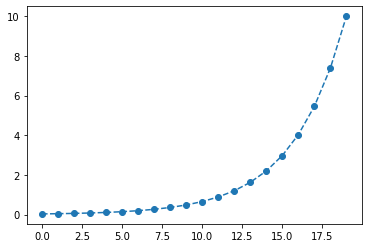

In [48]:
alphas_ = np.logspace(-1.5, 1, 20)

plt.plot(alphas_, 'o--')
# plt.plot(10**np.linspace(-1.5, 1, 20), c='r')
plt.show();

In [49]:
parameters = {
    'alpha':alphas_
}
model = Lasso()
model_cv = GridSearchCV(model, parameters, cv=5)
model_cv.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': array([ 0.03162278,  0.04281332,  0.05796394,  0.078476  ,  0.10624678,
        0.14384499,  0.1947483 ,  0.26366509,  0.35696988,  0.48329302,
        0.65431891,  0.88586679,  1.19935395,  1.62377674,  2.19839265,
        2.97635144,  4.02961132,  5.45559478,  7.38619982, 10.        ])})

In [50]:
cv_results_ = pd.DataFrame(model_cv.cv_results_)
cv_results_.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.002116,0.000803,0.001392,0.000150,0.031623,{'alpha': 0.03162277660168379},0.939269,0.939067,0.863812,0.936987,0.677592,0.871346,0.101100,18
1,0.001896,0.000112,0.001241,0.000062,0.042813,{'alpha': 0.04281332398719394},0.938359,0.939181,0.863729,0.937856,0.681686,0.872162,0.099540,17
2,0.001003,0.000518,0.000578,0.000339,0.057964,{'alpha': 0.05796393953384967},0.937129,0.939246,0.862876,0.938884,0.687003,0.873028,0.097508,16
3,0.000559,0.000007,0.000386,0.000005,0.078476,{'alpha': 0.07847599703514614},0.935545,0.939172,0.861896,0.939510,0.692607,0.873746,0.095264,15
4,0.000544,0.000003,0.000376,0.000002,0.106247,{'alpha': 0.10624678308940412},0.935194,0.938776,0.861573,0.938606,0.698061,0.874442,0.092976,13


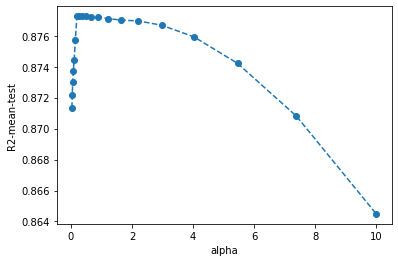

In [51]:
plt.plot(cv_results_['param_alpha'], cv_results_['mean_test_score'], 'o--');

plt.ylabel('R2-mean-test')
plt.xlabel('alpha')
plt.show()

In [52]:
print(*[1,2,3])

1 2 3


In [53]:
# model = Lasso(alpha=0.35696988468260643)
model = Lasso(**model_cv.best_params_)
model

Lasso(alpha=0.35696988468260643)

In [54]:
model.fit(X_train, y_train)

{'train':model.score(X_train, y_train), 
 'test':model.score(X_test, y_test)
}


{'train': 0.9042369373186554, 'test': 0.8736128096201369}

In [55]:
coef_ = pd.DataFrame(list(zip(features,model.coef_)), columns=['feature','coef'])


In [56]:
coef_[np.abs(coef_['coef'])<0.00000001]

,feature,coef
3,IsLarge,-0.0
4,Area_suburban,-0.0
5,Area_urban,0.0


#### alpha и lambda в Elastic net

In [57]:
import warnings
from sklearn.exceptions import ConvergenceWarning

from sklearn.linear_model import ElasticNet

alphas_ = np.logspace(-1.5, 1, 20)
l1_ratio_ = np.linspace(0,1, 11)

parameters = {
    'alpha':alphas_,
    'l1_ratio':l1_ratio_,   
}
model = ElasticNet()

model_cv = GridSearchCV(
    model, parameters, cv=5, 
    scoring='neg_mean_absolute_error'
    # можно выбрать другую метрику
    # https://scikit-learn.org/stable/modules/model_evaluation.html#regression-metrics
)


with warnings.catch_warnings():
    warnings.filterwarnings("ignore", category=ConvergenceWarning)
    model_cv.fit(X_train, y_train)
    
cv_results_ = pd.DataFrame(model_cv.cv_results_)
cv_results_.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,param_l1_ratio,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.004502,0.004023,0.001015,0.000522,0.031623,0.0,"{'alpha': 0.03162277660168379, 'l1_ratio': 0.0}",-0.965646,-1.119711,-1.502010,-1.312542,-1.563590,-1.292700,0.225599,216
1,0.000950,0.000613,0.002428,0.004019,0.031623,0.1,"{'alpha': 0.03162277660168379, 'l1_ratio': 0.1}",-0.966611,-1.119087,-1.502411,-1.308883,-1.561030,-1.291604,0.224816,213
2,0.000922,0.000584,0.000418,0.000057,0.031623,0.2,"{'alpha': 0.03162277660168379, 'l1_ratio': 0.2}",-0.967581,-1.118759,-1.502799,-1.306240,-1.558410,-1.290758,0.223994,211
3,0.000560,0.000029,0.000369,0.000015,0.031623,0.3,"{'alpha': 0.03162277660168379, 'l1_ratio': 0.3...",-0.968669,-1.118426,-1.503174,-1.304633,-1.555730,-1.290126,0.223142,210
4,0.000765,0.000449,0.000358,0.000003,0.031623,0.4,"{'alpha': 0.03162277660168379, 'l1_ratio': 0.4}",-0.970280,-1.118087,-1.503534,-1.302990,-1.553884,-1.289755,0.222340,208


In [58]:
cv_results_.shape

(220, 15)

In [59]:
alphas_.size * l1_ratio_.size

220

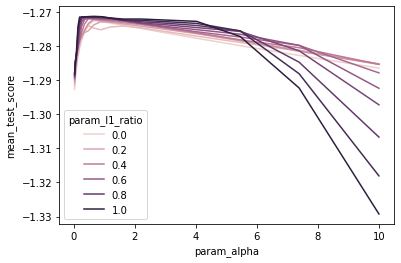

In [60]:
sns.lineplot(data=cv_results_, y='mean_test_score', x='param_alpha', hue='param_l1_ratio')
plt.show()

In [61]:
model_cv.best_params_

{'alpha': 0.6543189129712965, 'l1_ratio': 1.0}

In [62]:
model = ElasticNet(**model_cv.best_params_)
model.fit(X_train, y_train)

{'train':model.score(X_train, y_train), 
 'test':model.score(X_test, y_test)
}

{'train': 0.9041792733052684, 'test': 0.8748287531763973}

## Логистическая регрессия

In [63]:
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

In [64]:
from sklearn.datasets import fetch_openml
X, y = fetch_openml("titanic", version=1, as_frame=True, return_X_y=True)
# описание есть тут
# https://www.kaggle.com/competitions/titanic/data?select=train.csv

In [65]:
X.head()

,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,None,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,None,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,None,NaN,"Montreal, PQ / Chesterville, ON"


In [66]:
y = y.astype(int)
y.head()

0    1
1    1
2    0
3    0
4    0
Name: survived, dtype: int64

In [67]:
X.nunique().sort_values()

sex             2
pclass          3
embarked        3
sibsp           7
parch           8
boat           27
age            98
body          121
cabin         186
fare          281
home.dest     369
ticket        929
name         1307
dtype: int64

In [68]:
drop_cols = ['name', 'cabin','home.dest', 'ticket','boat','body']
X = X.drop(drop_cols, axis=1)
X.head()

,pclass,sex,age,sibsp,parch,fare,embarked
0,1.0,female,29.0000,0.0,0.0,211.3375,S
1,1.0,male,0.9167,1.0,2.0,151.5500,S
2,1.0,female,2.0000,1.0,2.0,151.5500,S
3,1.0,male,30.0000,1.0,2.0,151.5500,S
4,1.0,female,25.0000,1.0,2.0,151.5500,S


In [69]:
drop_categories = ['embarked_S', 'sex_male']
X = pd.get_dummies(X).drop(drop_categories, axis=1)
X.head()

,pclass,age,sibsp,parch,fare,sex_female,embarked_C,embarked_Q
0,1.0,29.0000,0.0,0.0,211.3375,1,0,0
1,1.0,0.9167,1.0,2.0,151.5500,0,0,0
2,1.0,2.0000,1.0,2.0,151.5500,1,0,0
3,1.0,30.0000,1.0,2.0,151.5500,0,0,0
4,1.0,25.0000,1.0,2.0,151.5500,1,0,0


In [70]:
X.isna().sum().sort_values()/X.size

pclass        0.000000
sibsp         0.000000
parch         0.000000
sex_female    0.000000
embarked_C    0.000000
embarked_Q    0.000000
fare          0.000095
age           0.025115
dtype: float64

In [71]:
X = X.dropna()
X['fare'] = np.log(1+X['fare'])
y = y.loc[X.index]

X.isna().sum().sort_values()

pclass        0
age           0
sibsp         0
parch         0
fare          0
sex_female    0
embarked_C    0
embarked_Q    0
dtype: int64

In [72]:
# https://www.statsmodels.org/dev/generated/statsmodels.discrete.discrete_model.Logit.html
from statsmodels.discrete.discrete_model import Logit

In [73]:
X['const'] = np.ones_like(y)
sm_model = Logit(y, X).fit()

Optimization terminated successfully.
         Current function value: 0.457137
         Iterations 6


In [74]:
sm_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               survived   No. Observations:                 1045
Model:                          Logit   Df Residuals:                     1036
Method:                           MLE   Df Model:                            8
Date:                Fri, 15 Jul 2022   Pseudo R-squ.:                  0.3241
Time:                        02:28:01   Log-Likelihood:                -477.71
converged:                       True   LL-Null:                       -706.79
Covariance Type:            nonrobust   LLR p-value:                 6.614e-94
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
pclass        -1.0717      0.168     -6.381      0.000      -1.401      -0.743
age           -0.0376      0.007     -5.675      0.000      -0.051      -0.025
sibsp         -0.3329      0.114     -2.924      0.003      -0.556      -0.110
parch          0.0698      0.109      0.638      0.524      -0.145       0.284
fare          -0.0546      0.150     -0.364      0.716      -0.348       0.239
sex_female     2.6253      0.180     14.574      0.000       2.272       2.978
embarked_C     0.7013      0.212      3.314      0.001       0.287       1.116
embarked_Q    -0.7675      0.406     -1.890      0.059      -1.563       0.028
const          2.2173      0.787      2.816      0.005       0.674       3.760
==============================================================================
"""

In [75]:
sm_model.params[sm_model.pvalues<=0.05]

pclass       -1.071742
age          -0.037608
sibsp        -0.332885
sex_female    2.625331
embarked_C    0.701308
const         2.217320
dtype: float64

In [76]:
sm_model.params[sm_model.pvalues>0.05]

parch         0.069773
fare         -0.054576
embarked_Q   -0.767472
dtype: float64

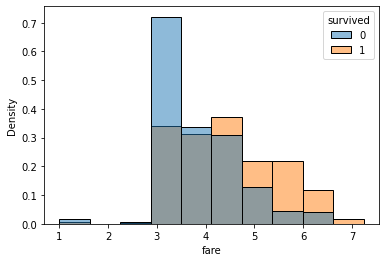

In [77]:
# дейсвтительно ли стоимость билета не влияла?
sns.histplot(data=pd.concat([y, 1+X['fare']], axis=1), x='fare', hue='survived', 
             common_norm=False, stat='density', bins=10, 
#              log_scale=True
            );

In [78]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=2000)
model.fit(X.drop(['const'], axis=1), y)

LogisticRegression(max_iter=2000)

- В sklearn добавлена L2 регуляризация в функцию потерь, в statsmodels – нет
- регуляризация добавляет небольшое смещение в модель

In [79]:
pd.DataFrame(list(zip(
    X.drop(['const'], axis=1).columns.values, 
    model.coef_.ravel()))
            ).set_index(0)[1].sort_values()

0
pclass       -1.031760
embarked_Q   -0.638101
sibsp        -0.325788
age          -0.036844
fare         -0.025036
parch         0.069903
embarked_C    0.666738
sex_female    2.527728
Name: 1, dtype: float64

In [80]:
sm_model.params.sort_values()

pclass       -1.071742
embarked_Q   -0.767472
sibsp        -0.332885
fare         -0.054576
age          -0.037608
parch         0.069773
embarked_C    0.701308
const         2.217320
sex_female    2.625331
dtype: float64

### Метрики классификации

- более подробный обзор метрик прочитайте [тут](https://github.com/hse-python-mirec/dap_mirec_2022/blob/main/seminar10/10_logit_ROC.ipynb)

In [81]:
from sklearn.metrics import \
    accuracy_score, precision_score, recall_score, f1_score, \
    classification_report, confusion_matrix,\
    log_loss, roc_auc_score, average_precision_score,\
    roc_curve, precision_recall_curve

In [82]:
y_true = y
y_pred = model.predict(X.drop(['const'], axis=1))

In [83]:
cm = confusion_matrix(y_true,y_pred)
tn, fp, fn, tp = cm.ravel()
tn, fp, fn, tp

(527, 91, 125, 302)

In [84]:
pd.DataFrame(cm.T, index=['pred=0','pred=1'],columns=['true=0','true=1'],)

,true=0,true=1
pred=0,527,125
pred=1,91,302


In [85]:
# recall and precision
302/(302+125), 302/(302+91)

(0.7072599531615925, 0.7684478371501272)

In [86]:
# accuracy
(302+527)/(302+527+125+91)

0.7933014354066986

In [87]:
{'accuracy_score':accuracy_score(y_true,y_pred), 
'precision_score':precision_score(y_true,y_pred), 
'recall_score':recall_score(y_true,y_pred), 
'f1_score':f1_score(y_true,y_pred)}

{'accuracy_score': 0.7933014354066986,
 'precision_score': 0.7684478371501272,
 'recall_score': 0.7072599531615925,
 'f1_score': 0.7365853658536585}

In [88]:
print(classification_report(y_true,y_pred))

              precision    recall  f1-score   support

           0       0.81      0.85      0.83       618
           1       0.77      0.71      0.74       427

    accuracy                           0.79      1045
   macro avg       0.79      0.78      0.78      1045
weighted avg       0.79      0.79      0.79      1045



In [89]:
y_pred_proba = model.predict_proba(X.drop(['const'], axis=1))[:,1]
y_pred_proba

array([0.9127718 , 0.66311897, 0.95949726, ..., 0.19733263, 0.19443099,
       0.10304851])

In [90]:
(y_pred_proba>0.3).mean()

0.5129186602870813

In [91]:
log_loss(y_true, y_pred_proba)

0.45732521973553897

In [92]:
# log_loss своими руками

-(np.log(y_pred_proba)*y_true + np.log(1-y_pred_proba)*(1-y_true)).mean()

0.45732521973553897

In [93]:
y_true = [1, 0, 1, 0, 1, 0, 0]
y_pred_proba = [0.6, 0.5, 0.3, 0.20, 0.15, 0.1, 0.0]
# P(y=1)

print('y',*y_true, sep='\t')
print('P(y=1)',*y_pred_proba, sep='\t')


y	1	0	1	0	1	0	0
P(y=1)	0.6	0.5	0.3	0.2	0.15	0.1	0.0


In [94]:
# все возможные пары единиц и нулей
# сравнение их вероятностей
# если вероятность у единицы больше, чем у нуля, то они отсортированы верно
# значит пара хорошая
a = [
0.6>0.5,
0.6>0.2,
0.6>0.1,
0.6>0.0,
0.3>0.5, # плохая пара
0.3>0.2, 
0.3>0.1,
0.3>0.0,
0.15>0.5, # плохая пара
0.15>0.2, # плохая пара
0.15>0.1,
0.15>0.0,
]
a

[True, True, True, True, False, True, True, True, False, False, True, True]

In [95]:
1-3/12

0.75

In [96]:
# доля хороших пар
np.mean(a)

0.75

In [97]:
roc_auc_score(y_true, y_pred_proba)

0.75

In [98]:
roc_auc_score(y_true, [0.5]*7)

0.5

In [99]:
fpr, tpr, threshhold = roc_curve(y_true, y_pred_proba)

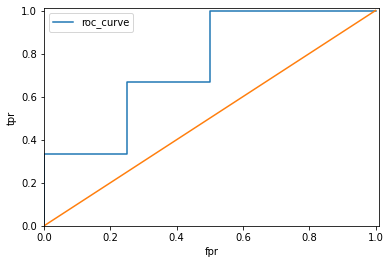

In [100]:
plt.plot(fpr, tpr, label='roc_curve');
plt.plot([0,1],[0,1])

plt.ylabel('tpr')
plt.xlabel('fpr')

plt.xlim(0,1.01)
plt.ylim(0,1.01)

plt.legend()
plt.show()

In [101]:
# gini
2*roc_auc_score(y_true, y_pred_proba)-1

0.5

In [102]:
2*roc_auc_score(y_true, [0.5]*7)-1

0.0

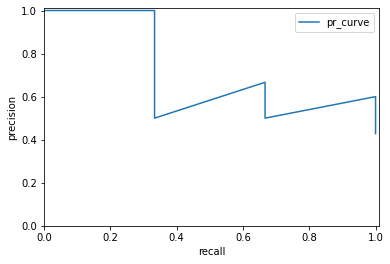

In [103]:
precision, recall, thresholds = precision_recall_curve(y_true, y_pred_proba)
plt.plot(recall, precision, label='pr_curve');

plt.ylabel('precision')
plt.xlabel('recall')

plt.xlim(0,1.01)
plt.ylim(0,1.01)

plt.legend()
plt.show()

In [104]:
average_precision_score(y_true, y_pred_proba)

0.7555555555555555

In [105]:
{'roc_auc_score':roc_auc_score(y_true,y_pred_proba), 
'average_precision_score':average_precision_score(y_true,y_pred_proba), 
'log_loss':log_loss(y_true,y_pred_proba), 
}

{'roc_auc_score': 0.75,
 'average_precision_score': 0.7555555555555555,
 'log_loss': 0.6619385229299699}

## Метод ближайших соседей

- прочитайте чуть более подробный обзор [тут](https://github.com/hse-python-mirec/dap_mirec_2022/blob/main/seminar11/sem11-sklearn-knn.ipynb)
- но есть еще очень много других алгоритмов, посмотрите обзор [тут](https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html)

In [106]:
from sklearn.datasets import load_iris
data = load_iris()
X = pd.DataFrame(data['data'], columns = data['feature_names'])
y = data['target']

mask = y>=1
X = X[['sepal length (cm)','sepal width (cm)']][mask].values
y = y[mask]



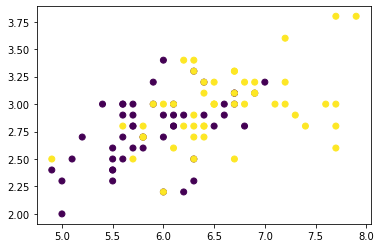

In [107]:
plt.scatter(X[:,0], X[:,1], c=y);

In [108]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [109]:
# оч важно для KNN
scaler = MinMaxScaler()
X_transformed = scaler.fit_transform(X)

## когда даныне разбиты на трейн и тест, делайте так:
# scaler.fit(X_train)
# X_train_transformed = scaler.transform(X_train)
# X_test_transformed = scaler.transform(X_test)

In [110]:
X_transformed.min(axis=0), X_transformed.max(axis=0)

(array([0., 0.]), array([1., 1.]))

### Сравнение лог. регрессии с kNN

In [111]:
# Plotting decision regions
# границы координат
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
# много-много точек вдоль границ координат
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.05), np.arange(y_min, y_max, 0.05))


def plot_decision_regions(clfs, names):
    fig, axes = plt.subplots(2, 2, sharex='col', sharey='row', figsize=(10, 8))
    for i, (clf, clf_name) in enumerate(zip(clfs, names)):

        # prediction of class
        Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:,1]
        Z = Z.reshape(xx.shape)

        plt.subplot(2,2,i+1)
        plt.contourf(xx, yy, Z, alpha=0.4, cmap='coolwarm')
        plt.scatter(x=X[:, 0], y=X[:, 1], c=y, s=20, cmap='coolwarm')
        plt.title(clf_name)
        plt.grid(False)
        plt.xticks([])
        plt.yticks([])

    plt.show()


In [112]:
from sklearn.neighbors import KNeighborsClassifier

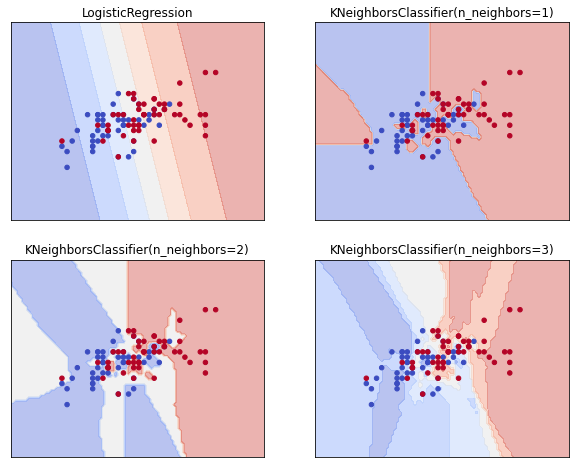

In [113]:

plot_decision_regions([
    LogisticRegression().fit(X,y),
    KNeighborsClassifier(n_neighbors=1).fit(X,y),
    KNeighborsClassifier(n_neighbors=2).fit(X,y),
    KNeighborsClassifier(n_neighbors=5).fit(X,y),
], 
    ['LogisticRegression',
     'KNeighborsClassifier(n_neighbors=1)',
     'KNeighborsClassifier(n_neighbors=2)',
     'KNeighborsClassifier(n_neighbors=3)',
    ])

### Сравнение лин. регрессии с kNN

In [114]:
from sklearn.neighbors import KNeighborsRegressor

df = pd.read_csv('Advertising.csv', index_col=0)

knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(df[['TV']].values, df['Sales'].values)
x_lin = np.linspace(df[['TV']].min()[0], df[['TV']].max()[0], 100)
x_lin = x_lin[:,None]
y_pred_1 = knn.predict(x_lin)

knn = KNeighborsRegressor(n_neighbors=25)
knn.fit(df[['TV']].values, df['Sales'].values)
x_lin = np.linspace(df[['TV']].min()[0], df[['TV']].max()[0], 100)
x_lin = x_lin[:,None]
y_pred_2 = knn.predict(x_lin)



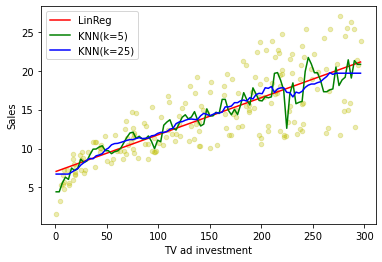

In [115]:
plt.scatter(df['TV'], df['Sales'], s=20, alpha=0.3, c='y')

# прогноз линейной регрессии
plt.plot(X_new['TV'], preds, c='red', label='LinReg')

# прогноз метода ближайших соседей с 5 соседям (очень подстраиваем под соседние точки)
plt.plot(x_lin, y_pred_1, c='green', label='KNN(k=5)')

# прогноз метода ближайших соседей с 25 соседями (смотрим на очень много точек вокруг)
plt.plot(x_lin, y_pred_2, c='blue', label='KNN(k=25)')

plt.xlabel('TV ad investment')
plt.ylabel('Sales')

plt.legend()

plt.show()